In [2]:
from vehicle_simulater import *
import csv


theta/dt =  0.28647889756541167


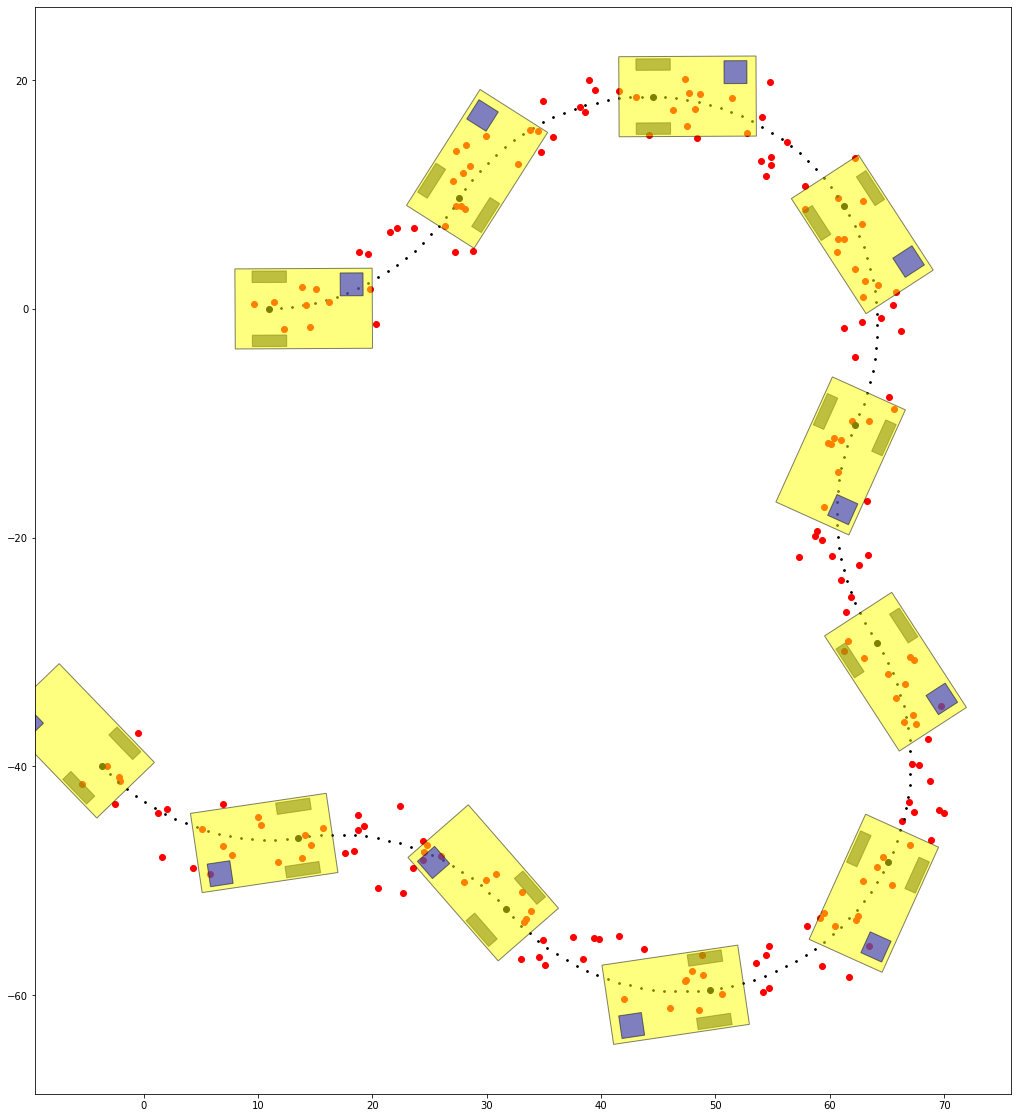

In [4]:

init_pos = [10,0,0]
init_vel = 10.0
init_w = 0.05
dt = 0.1
vehicle_noise = [3, 3]

#fig,ax = plt.subplots(figsize=[20,20])
vehicle = Vehicle( init_vel, init_w, dt)
vehicle.InitPosition(init_pos[0], init_pos[1], init_pos[2])

vehicle.SetNoise(vehicle_noise[0], vehicle_noise[1]);
fig_truck,ax_truck = plt.subplots(figsize=[20,20])
x_param = 0.1
y_param = 0.0
#measurements = [[ x_param * x * sin(x*pi/720), y_param * x * cos(x*pi/720)] for x in range(0,100)]
measurements = []
#vehicle.PlotCurrentVehiclePosition(ax, alpha=0.5)

with open("data/vehicle_pos.csv", 'w') as f:
    writer = csv.writer(f, quoting=csv.QUOTE_NONE, escapechar='\\')
    header = ["timestamp", "measurement_x", "measurement_y", "true_x", "true_y", "true_theta"]
    writer.writerow(header)

    for i in range( 200):
        state, true_state = vehicle.UpdateOneStep()

        measurements.append([state[0],state[1], 0])

        ax_truck.scatter(state[0], state[1], color="red")
        ax_truck.scatter(true_state[0], true_state[1], color="black", s=3)
        input = [i,state[0],state[1],true_state[0],true_state[1],true_state[2]]
        writer.writerow(input)
        if i%20 == 0:
            #print(i)
            vehicle.PlotCurrentVehiclePosition(ax_truck, alpha=0.5)
            if i%80 == 0:
                vehicle.ChangeAngularVelocity(0.5)
            else:
                vehicle.ChangeAngularVelocity(-0.5)

vehicle.PlotCurrentVehiclePosition(ax_truck, alpha=0.5)

ax_truck.set_aspect('equal')